## Classification Of Cifar 10 with various combination of parameters

### This code is a neural network model using the CIFAR-10 dataset, which consists of 60,000 color images of 10 different classes, each of size 32x32 pixels. The objective is to classify images into one of these classes (e.g., airplane, car, bird, etc.) using a fully connected neural network implemented in TensorFlow and Keras

In [1]:
!pip install tensorflow


## 1. Data Loading and Preprocessing

### Purpose: Load the CIFAR-10 dataset and print the shape of the training and test sets.
#### Explanation: The CIFAR-10 dataset is preloaded with TensorFlow's keras.datasets, which separates the data into training and test sets. This section prints the shape of the images and labels for both training and testing sets.

In [2]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print("Train shape", X_train.shape)
print("Test shape", X_test.shape)
print(y_train.shape)
print(y_test.shape)

print("Total labels", set(y_train.reshape(-1)))


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Train shape (50000, 32, 32, 3)
Test shape (10000, 32, 32, 3)
(50000, 1)
(10000, 1)
Total labels {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


### Purpose: Convert labels to a one-hot encoded format for multi-class classification.
#### Explanation: CIFAR-10 labels are integers from 0 to 9; OneHotEncoder transforms these into binary vectors, where each vector has a 1 in the position representing the class and 0s elsewhere, which is required for the categorical_crossentropy loss function used later.

In [4]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False)
y_train = onehot_encoder.fit_transform(y_train)
y_test = onehot_encoder.fit_transform(y_test)


## 2. Model Initialization and Architecture Definition

### Purpose: Define a simple feedforward neural network architecture.
#### Explanation: The input images (32x32x3 RGB) are flattened into a 3072-dimensional vector. The model has three hidden layers with 50 neurons each and uses the sigmoid activation function. The output layer has 10 neurons (for the 10 classes) with a softmax activation for multi-class probability output.

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
model = Sequential()
model.add(Dense(50, input_shape=(3072,), activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 50)                  │         153,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 159,260 (622.11 KB)

 Trainable params: 159,260 (622.11 KB)

 Non-trainable params: 0 (0.00 B)

## 3. Compilation and Training of the Model

### Purpose: Compile and train the model with specified settings.
#### Explanation: The model uses Stochastic Gradient Descent (SGD) with a learning rate of 0.01, categorical_crossentropy as the loss function for multi-class classification, and tracks accuracy as a metric. The model is trained for 100 epochs with a batch size of 50.

In [7]:
# Reshape and normalize the image data
X_train = X_train.reshape(-1, 32 * 32 * 3).astype('float32') / 255.0
X_test = X_test.reshape(-1, 32 * 32 * 3).astype('float32') / 255.0

# Verify shapes
print("Reshaped train data:", X_train.shape)
print("Reshaped test data:", X_test.shape)


Reshaped train data: (50000, 3072)
Reshaped test data: (10000, 3072)


The CIFAR-10 images have a shape of (32, 32, 3) (height, width, and color channels). To fix this, we need to flatten the image data before feeding it into the model.

In [8]:
from tensorflow.keras import optimizers
sgd = optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=50, epochs=100, verbose=1)


Epoch 1/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1052 - loss: 2.3845
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1215 - loss: 2.2985
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1377 - loss: 2.2946
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1515 - loss: 2.2888
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1736 - loss: 2.2787
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1835 - loss: 2.2602
Epoch 7/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1862 - loss: 2.2262
Epoch 8/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1993 - loss: 2.1755
Epoch 9/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2027 - loss: 2.1250
Epoch 10/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2043 - loss: 2.0938
Epoch 11/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2078 - loss: 2.0714
Epoch 12/100
1000/1

## 4. Plotting Training Loss

### Purpose: Visualize the training loss over epochs.
#### Explanation: This plot helps monitor the loss reduction over time to observe the model’s learning progression.

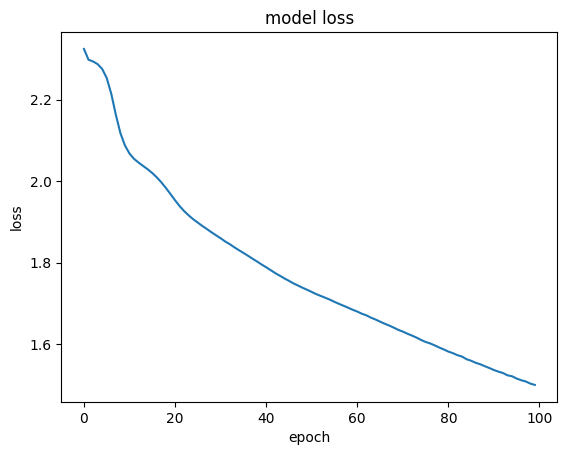

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


## 5. Model Evaluation

In [10]:
results = model.evaluate(X_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4498 - loss: 1.5386


## 6. Adding More Hidden Layers for Comparison

### Purpose: Modify the model to add more hidden layers and evaluate the performance impact.
#### Explanation: Five hidden layers are now used to assess if a deeper network structure improves accuracy. The network is then compiled and trained similarly but with a reduced learning rate.

In [20]:
model = Sequential()
model.add(Dense(50, input_shape=(3072,), activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 50)                  │         153,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 164,360 (642.03 KB)

 Trainable params: 164,360 (642.03 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
sgd = optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=50, epochs=100, verbose=1)


Epoch 1/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1008 - loss: 2.4973
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1006 - loss: 2.3128
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.1004 - loss: 2.3034
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.0991 - loss: 2.3027
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0970 - loss: 2.3026
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0997 - loss: 2.3026
Epoch 7/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.0978 - loss: 2.3027
Epoch 8/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0949 - loss: 2.3027
Epoch 9/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1003 - loss: 2.3026
Epoch 10/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1018 - loss: 2.3026
Epoch 11/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.1002 - loss: 2.3027
Epoch 12/100
1000/1

In [22]:
results = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1019 - loss: 2.3024


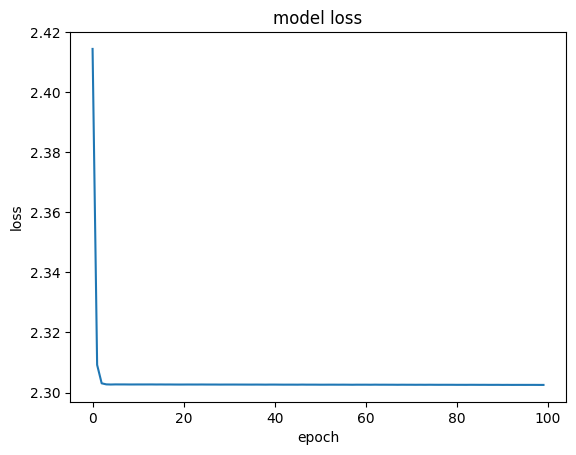

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
results = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1019 - loss: 2.3024


In [25]:
print('loss: ', results[0])
print('accuracy: ', results[1])

loss:  2.3024356365203857
accuracy:  0.10019999742507935


## Changing Activation function to Relu and Optimizer to Adam

In [26]:
model = Sequential()
model.add(Dense(50, input_shape=(3072,), activation='sigmoid'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 50)                  │         153,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 159,260 (622.11 KB)

 Trainable params: 159,260 (622.11 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
from tensorflow.keras.optimizers import Adam

adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=50, epochs=100, verbose=1)

Epoch 1/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2447 - loss: 2.0369
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3490 - loss: 1.7943
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3752 - loss: 1.7266
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3969 - loss: 1.6836
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4003 - loss: 1.6584
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4106 - loss: 1.6268
Epoch 7/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4214 - loss: 1.6048
Epoch 8/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4273 - loss: 1.5924
Epoch 9/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4389 - loss: 1.5669
Epoch 10/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4451 - loss: 1.5639
Epoch 11/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4430 - loss: 1.5573
Epoch 12/100
1000/

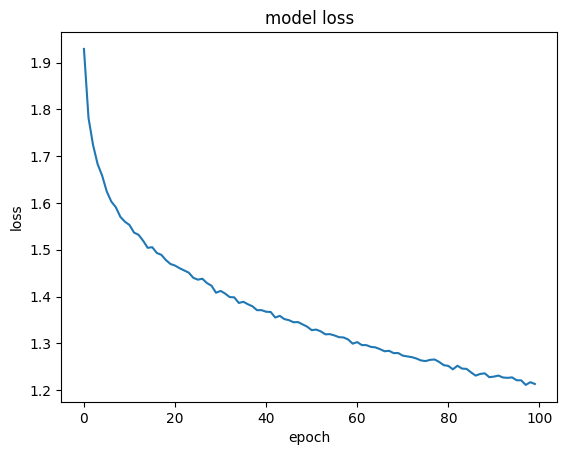

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
results = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4563 - loss: 1.5961


In [30]:
print(model.metrics_names)     # list of metric names the model is employing
print(results)

['loss', 'compile_metrics']
[1.6122989654541016, 0.4537999927997589]


In [18]:
print('loss: ', results[0])
print('accuracy: ', results[1])

loss:  1.5512224435806274
accuracy:  0.44359999895095825


## Inference
1.   Baseline Model 1 showed moderate performance, indicating that the initial configuration was a reasonable start.
2.   Adding more layers (Model 2) without adjusting activation functions or optimizers worsened performance, highlighting that deeper networks require careful tuning.
3.   Switching to ReLU and Adam (Model 3) resulted in better performance, demonstrating that activation functions like ReLU and adaptive optimizers like Adam can enhance model learning and accuracy.

The final inference is that using ReLU activations with the Adam optimizer is generally more effective for this model and dataset. However, further tuning (e.g., more neurons, dropout layers, or batch normalization) may be required for optimal performance.

#### To demonstrate classification examples,  we have used the trained model to predict the class labels for some images in the test set and then display these images with their predicted and true labels. Here’s how to add this feature to your code:

1. Make Predictions: Use the model to predict class probabilities on the test set.
2. Convert Predictions: Get the class with the highest probability for each prediction.
3. Display Results: Show a few test images along with their predicted and true labels.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


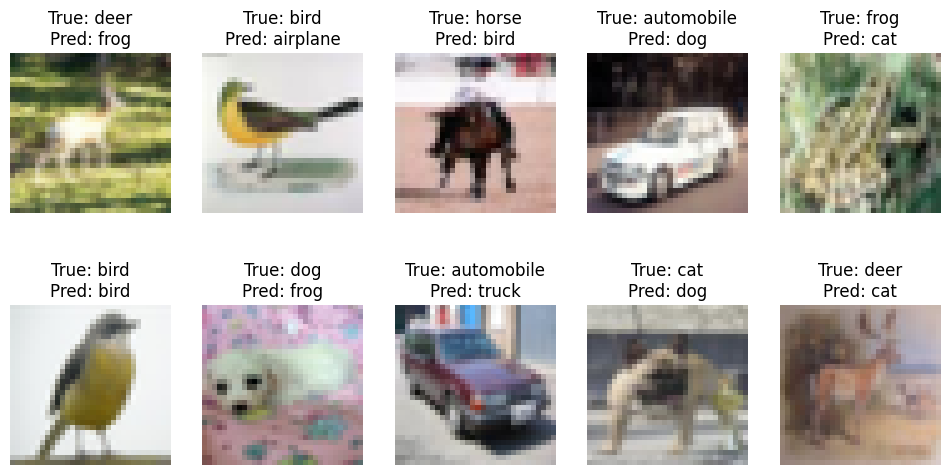

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)


num_examples = 10  # Number of images to show
indices = np.random.choice(range(len(X_test)), num_examples, replace=False)

plt.figure(figsize=(12, 6))
for i, index in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[index].reshape(32, 32, 3))  # Reshape each image back to 32x32x3
    plt.title(f"True: {class_names[y_true_classes[index]]}\nPred: {class_names[y_pred_classes[index]]}")
    plt.axis('off')
plt.show()
